In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import tree
import matplotlib.image as pltimg
import statsmodels.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
plt.style.use('ggplot')
import matplotlib
import seaborn as sns

In [53]:
wine_data = pd.read_csv("wine.csv")
wine_data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [54]:
wine_data.shape

(6494, 14)

In [55]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6494 entries, 0 to 6493
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6494 non-null   int64  
 1   fixed.acidity         6494 non-null   float64
 2   volatile.acidity      6494 non-null   float64
 3   citric.acid           6494 non-null   float64
 4   residual.sugar        6494 non-null   float64
 5   chlorides             6494 non-null   float64
 6   free.sulfur.dioxide   6494 non-null   float64
 7   total.sulfur.dioxide  6494 non-null   float64
 8   density               6494 non-null   float64
 9   pH                    6494 non-null   float64
 10  sulphates             6494 non-null   float64
 11  alcohol               6494 non-null   float64
 12  quality               6494 non-null   int64  
 13  wine                  6494 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.4+ KB


In [56]:
wine_data.isnull().sum()

Unnamed: 0              0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine                    0
dtype: int64

In [57]:
#check duplicated
wine_data.duplicated().sum()

0

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Data Preparation

# Encoding the 'wine' categorical variable
label_encoder = LabelEncoder()
wine_data['wine'] = label_encoder.fit_transform(wine_data['wine'])

# Separating features and target variable
X = wine_data.drop(['quality', 'Unnamed: 0'], axis=1)  # Dropping 'Unnamed: 0' as it's just an identifier
y = wine_data['quality']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape



((4545, 12), (1949, 12), (4545,), (1949,))

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Step 2: Model Building

# Implementing KNN with an initial K value
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Step 3: Optimizing K
# We will test K values from 1 to 20 and observe their performance
k_values = range(1, 21)
k_scores = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_temp, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Identifying the optimal K value
optimal_k = k_values[np.argmax(k_scores)]
optimal_k, max(k_scores)

(1, 0.5896589658965896)

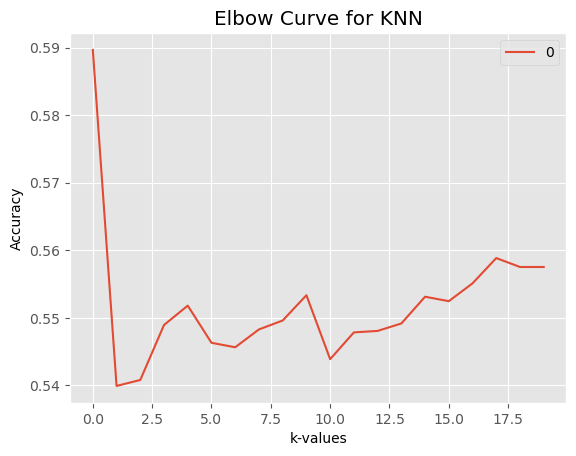

In [60]:
#plotting the accuracy values against k values
curve = pd.DataFrame(k_scores) #elbow curve 

# Plotting the curve
curve.plot()

# Adding x and y labels
plt.xlabel('k-values')
plt.ylabel('Accuracy')

# Optionally, you can also add a title
plt.title('Elbow Curve for KNN')

# Show the plot
plt.show()

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Building the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions and Evaluation for Decision Tree
dt_predictions = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_precision = precision_score(y_test, dt_predictions, average='weighted')

print("Decision Tree:")
print("Accuracy:",dt_accuracy, "\nRecall:",dt_recall, "\nPrecision:", dt_precision)
print()

Decision Tree:
Accuracy: 0.5915854284248332 
Recall: 0.5915854284248332 
Precision: 0.58938109816463



In [62]:
# Building the Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions and Evaluation for Random Forest
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_precision = precision_score(y_test, rf_predictions, average='weighted', zero_division=0)

print("Random Forest:")
print("Accuracy:",rf_accuracy, "\nRecall:",rf_recall, "\nPrecision:", rf_precision)

Random Forest:
Accuracy: 0.6731657260133401 
Recall: 0.6731657260133401 
Precision: 0.6737866909810681


In [63]:
# Building the Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions and Evaluation for Gradient Boosting
gb_predictions = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions, average='weighted')
gb_precision = precision_score(y_test, gb_predictions, average='weighted')

print("Gradient Boosting:")
print("Accuracy:",gb_accuracy, "\nRecall:",gb_recall, "\nPrecision:", gb_precision)

Gradient Boosting:
Accuracy: 0.5669574140584915 
Recall: 0.5669574140584915 
Precision: 0.5578200728955279


In [64]:
from sklearn.neural_network import MLPClassifier

# Building Neural Network with 'adam' solver
nn_adam = MLPClassifier(solver='adam', random_state=42, max_iter=2000)
nn_adam.fit(X_train_scaled, y_train)

# Predictions and Evaluation for Neural Network with 'adam' solver
nn_adam_predictions = nn_adam.predict(X_test_scaled)
nn_adam_accuracy = accuracy_score(y_test, nn_adam_predictions)
nn_adam_recall = recall_score(y_test, nn_adam_predictions, average='weighted', zero_division=0)
nn_adam_precision = precision_score(y_test, nn_adam_predictions, average='weighted')

print("Neural Network with 'adam' solver:")
print("Accuracy:",nn_adam_accuracy, "\nRecall:",nn_adam_recall, "\nPrecision:", nn_adam_precision)

Neural Network with 'adam' solver:
Accuracy: 0.5613134940995382 
Recall: 0.5613134940995382 
Precision: 0.5487270592424407


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Building Neural Network with 'sgd' solver
nn_sgd = MLPClassifier(solver='sgd', random_state=42, max_iter=2000)
nn_sgd.fit(X_train_scaled, y_train)

# Predictions and Evaluation for Neural Network with 'sgd' solver
nn_sgd_predictions = nn_sgd.predict(X_test_scaled)
nn_sgd_accuracy = accuracy_score(y_test, nn_sgd_predictions)
nn_sgd_recall = recall_score(y_test, nn_sgd_predictions, average='weighted')
nn_sgd_precision = precision_score(y_test, nn_sgd_predictions, average='weighted')

print("Neural Network with 'sgd' solver:")
print("Accuracy:",nn_sgd_accuracy, "\nRecall:",nn_sgd_recall, "\nPrecision:", nn_sgd_precision)

Neural Network with 'sgd' solver:
Accuracy: 0.5649050795279631 
Recall: 0.5649050795279631 
Precision: 0.5388605513792124


In [69]:
# Initialize the neural network model
nn_1 = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter = 10000, random_state=42, early_stopping=True)

# Define the parameter grid
parameter_space = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (200,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Initialize GridSearchCV
clf = GridSearchCV(nn_1, parameter_space, n_jobs=-1, cv=3)

# Run Grid Search
clf.fit(X_train_scaled, y_train)

# Best parameters and accuracy
best_params = clf.best_params_
best_score = clf.best_score_

# Evaluate on Test Data
y_pred_nn_optimized = clf.predict(X_test_scaled)
optimized_accuracy = accuracy_score(y_test, y_pred_nn_optimized)


In [71]:
optimized_nn_recall = recall_score(y_test, y_pred_nn_optimized, average='weighted')
optimized_nn_precision = precision_score(y_test, y_pred_nn_optimized, average='weighted', zero_division=0)
print('Optimized neural network model:')
print("Accuracy:",optimized_accuracy, "\nRecall:",optimized_nn_recall, "\nPrecision:", optimized_nn_precision)

Optimized neural network model:
Accuracy: 0.5695228322216521 
Recall: 0.5695228322216521 
Precision: 0.5450161624516497


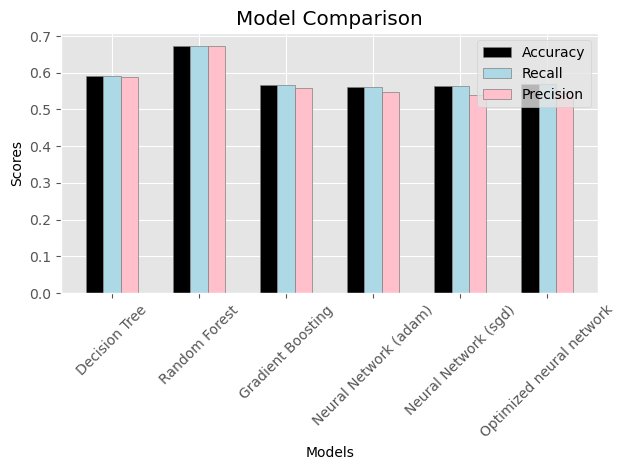

In [72]:
import matplotlib.pyplot as plt

# Model names
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network (adam)', 'Neural Network (sgd)', 'Optimized neural network']

# Metrics for each model
accuracy = [dt_accuracy, rf_accuracy, gb_accuracy, nn_adam_accuracy, nn_sgd_accuracy, optimized_accuracy]
recall = [dt_recall, rf_recall, gb_recall, nn_adam_recall, nn_sgd_recall, optimized_nn_recall]
precision = [dt_precision, rf_precision, gb_precision, nn_adam_precision, nn_sgd_precision, optimized_nn_precision]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar plot
plt.bar(r1, accuracy, color='black', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, recall, color='lightblue', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, precision, color='pink', width=bar_width, edgecolor='grey', label='Precision')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45)  # Rotate labels by 45 degrees
plt.title('Model Comparison')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
